C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4832\437195203.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_two_classes['class'] = label_encoder.fit_transform(iris_two_classes['species'])


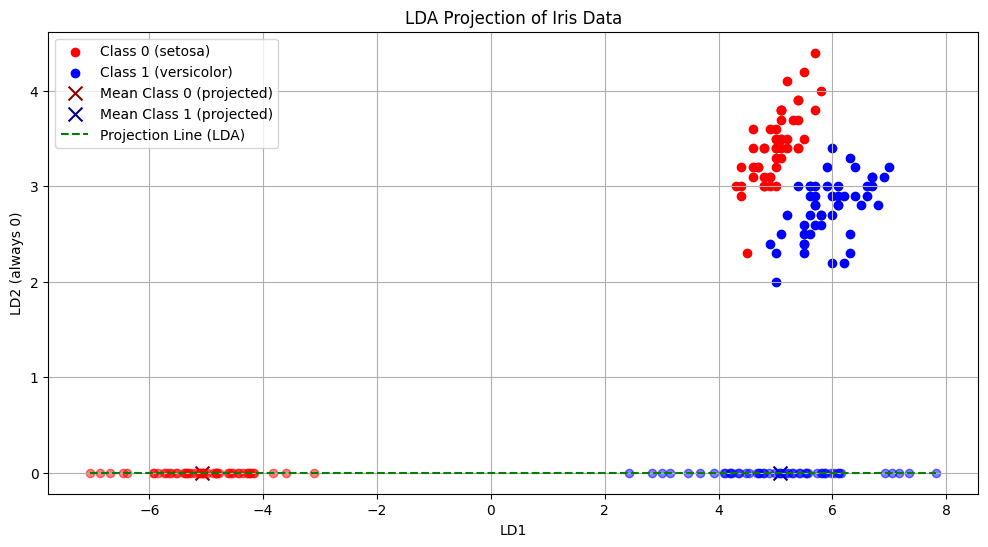

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Filter the dataset to contain only two classes
iris_two_classes = iris[iris['species'].isin(['setosa', 'versicolor'])]

# Encode labels
label_encoder = LabelEncoder()
iris_two_classes['class'] = label_encoder.fit_transform(iris_two_classes['species'])

# Separate the features and the labels
X = iris_two_classes.drop(columns=['species', 'class'])
y = iris_two_classes['class']

# Fit LDA model
lda = LDA()
X_lda = lda.fit_transform(X, y)

# Projected means
mu1_proj = X_lda[y == 1].mean()
mu0_proj = X_lda[y == 0].mean()

# Plot original points and their projections
plt.figure(figsize=(12, 6))

# Scatter plot for original points
plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], color='red', label='Class 0 (setosa)')
plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], color='blue', label='Class 1 (versicolor)')

# Mean points
plt.scatter(mu0_proj, 0, color='darkred', marker='x', s=100, label='Mean Class 0 (projected)')
plt.scatter(mu1_proj, 0, color='darkblue', marker='x', s=100, label='Mean Class 1 (projected)')

# Projection line (LDA direction)
x_vals = np.linspace(X_lda.min(), X_lda.max(), 100)
y_vals = np.zeros_like(x_vals)  # Since the transformed data is 1D

plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Projection Line (LDA)')

# Projected points
plt.scatter(X_lda[y == 0], np.zeros_like(X_lda[y == 0]), color='red', alpha=0.5)
plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), color='blue', alpha=0.5)

plt.xlabel('LD1')
plt.ylabel('LD2 (always 0)')
plt.legend()
plt.title('LDA Projection of Iris Data')
plt.grid(True)
plt.show()
